In [2]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(np.array(snake_env.results['score']))

### Testando: Gamma

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 78.9     |
|    ep_rew_mean        | -33.8    |
| time/                 |          |
|    fps                | 239      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.199   |
|    explained_variance | -205     |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.0733   |
|    value_loss         | 23.7     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93.2     |
|    ep_rew_mean        | -18      |
| time/                 |          |
|    fps                | 230      |
|    iterations         | 2000     |
|    time_elapsed       | 43       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 70.9     |
|    ep_rew_mean        | -9.7     |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 2000     |
|    time_elapsed       | 42       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.193   |
|    explained_variance | 0.345    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 2.4      |
|    value_loss         | 54.3     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 91.3     |
|    ep_rew_mean        | 9.9      |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 3000     |
|    time_elapsed       | 63       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93.3     |
|    ep_rew_mean        | -3.5     |
| time/                 |          |
|    fps                | 299      |
|    iterations         | 3000     |
|    time_elapsed       | 50       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.518   |
|    explained_variance | -72.2    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -17.2    |
|    value_loss         | 1.37e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 104       |
|    ep_rew_mean        | 3.8       |
| time/                 |           |
|    fps                | 309       |
|    iterations         | 4000      |
|    time_elapsed       | 64        |
|    total_timesteps    | 20000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 120      |
|    ep_rew_mean        | 39       |
| time/                 |          |
|    fps                | 259      |
|    iterations         | 4000     |
|    time_elapsed       | 77       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.01    |
|    explained_variance | 0.437    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.00327  |
|    value_loss         | 2.26     |
------------------------------------
iteration  9 : gamma 0.9757687865104703
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 88.9     |
|    ep_rew_mean        | -29.6    |
| time/                 |          |
|    fps                | 361      |
|    iterations         | 1000     |
|    time_elapsed       | 13       |
|    total_timeste

iteration  12 : gamma 0.9865465968743526
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 84.5     |
|    ep_rew_mean        | -33.1    |
| time/                 |          |
|    fps                | 243      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.21    |
|    explained_variance | -0.953   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.0109   |
|    value_loss         | 6.13     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 62.5     |
|    ep_rew_mean        | -12.8    |
| time/                 |          |
|    fps                | 217      |
|    iterations         | 2000     |
|    time_elapsed       | 46       |
|    total_timest

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 85.8     |
|    ep_rew_mean        | -18.1    |
| time/                 |          |
|    fps                | 212      |
|    iterations         | 2000     |
|    time_elapsed       | 47       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.0108  |
|    explained_variance | 0.354    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 0.000861 |
|    value_loss         | 1.84     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 94.5      |
|    ep_rew_mean        | 3.8       |
| time/                 |           |
|    fps                | 219       |
|    iterations         | 3000      |
|    time_elapsed       | 68        |
|    total_timesteps    | 15000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 72.8     |
|    ep_rew_mean        | -4.6     |
| time/                 |          |
|    fps                | 350      |
|    iterations         | 3000     |
|    time_elapsed       | 42       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.152   |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.022   |
|    value_loss         | 0.537    |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 98.6      |
|    ep_rew_mean        | 11.4      |
| time/                 |           |
|    fps                | 351       |
|    iterations         | 4000      |
|    time_elapsed       | 56        |
|    total_timesteps    | 20000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 141      |
|    ep_rew_mean        | 60       |
| time/                 |          |
|    fps                | 313      |
|    iterations         | 4000     |
|    time_elapsed       | 63       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.00066 |
|    explained_variance | -223     |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 8.54e-05 |
|    value_loss         | 37       |
------------------------------------
iteration  22 : gamma 0.9707112544682519
Using cpu device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 76.9      |
|    ep_rew_mean        | -33.1     |
| time/                 |           |
|    fps                | 266       |
|    iterations         | 1000      |
|    time_elapsed       | 18        |
|    tota

iteration  25 : gamma 0.9978618446956322
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 83       |
|    ep_rew_mean        | -30.8    |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 1000     |
|    time_elapsed       | 21       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.264   |
|    explained_variance | -158     |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.509    |
|    value_loss         | 47.6     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 66.9     |
|    ep_rew_mean        | -10.2    |
| time/                 |          |
|    fps                | 270      |
|    iterations         | 2000     |
|    time_elapsed       | 36       |
|    total_timest

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 81.8     |
|    ep_rew_mean        | -5.1     |
| time/                 |          |
|    fps                | 350      |
|    iterations         | 2000     |
|    time_elapsed       | 28       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.0274  |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.00431 |
|    value_loss         | 1.54     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 99.2     |
|    ep_rew_mean        | 23.8     |
| time/                 |          |
|    fps                | 334      |
|    iterations         | 3000     |
|    time_elapsed       | 44       |
|    total_timesteps    | 15000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 98.6      |
|    ep_rew_mean        | 24.4      |
| time/                 |           |
|    fps                | 288       |
|    iterations         | 3000      |
|    time_elapsed       | 51        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.000639 |
|    explained_variance | 0.395     |
|    learning_rate      | 0.001     |
|    n_updates          | 2999      |
|    policy_loss        | 3.09e-06  |
|    value_loss         | 0.72      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 116       |
|    ep_rew_mean        | 41.3      |
| time/                 |           |
|    fps                | 285       |
|    iterations         | 4000      |
|    time_elapsed       | 70        |
|    total_timesteps    | 20000     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 116      |
|    ep_rew_mean        | 38.4     |
| time/                 |          |
|    fps                | 278      |
|    iterations         | 4000     |
|    time_elapsed       | 71       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0151  |
|    explained_variance | 0.0203   |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 6.47e-05 |
|    value_loss         | 0.00156  |
------------------------------------
iteration  35 : gamma 0.9892253608643671
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 99.2     |
|    ep_rew_mean        | -36.6    |
| time/                 |          |
|    fps                | 222      |
|    iterations         | 1000     |
|    time_elapsed       | 22       |
|    total_timest

iteration  38 : gamma 0.9535506000847691
Using cpu device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 157       |
|    ep_rew_mean        | -44.5     |
| time/                 |           |
|    fps                | 271       |
|    iterations         | 1000      |
|    time_elapsed       | 18        |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -0.476    |
|    explained_variance | -0.342    |
|    learning_rate      | 0.001     |
|    n_updates          | 999       |
|    policy_loss        | -0.000187 |
|    value_loss         | 9.85e-06  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 107      |
|    ep_rew_mean        | -28      |
| time/                 |          |
|    fps                | 271      |
|    iterations         | 2000     |
|    time_elapsed       | 36       |


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.4     |
|    ep_rew_mean        | 1.5      |
| time/                 |          |
|    fps                | 290      |
|    iterations         | 2000     |
|    time_elapsed       | 34       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.0619  |
|    explained_variance | -13.1    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 0.0359   |
|    value_loss         | 34       |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 111       |
|    ep_rew_mean        | 34.8      |
| time/                 |           |
|    fps                | 310       |
|    iterations         | 3000      |
|    time_elapsed       | 48        |
|    total_timesteps    | 15000     |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 84        |
|    ep_rew_mean        | 1.6       |
| time/                 |           |
|    fps                | 240       |
|    iterations         | 3000      |
|    time_elapsed       | 62        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.239    |
|    explained_variance | -1.36e+03 |
|    learning_rate      | 0.001     |
|    n_updates          | 2999      |
|    policy_loss        | 0.081     |
|    value_loss         | 76.5      |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 92.5     |
|    ep_rew_mean        | 12.4     |
| time/                 |          |
|    fps                | 240      |
|    iterations         | 4000     |
|    time_elapsed       | 83       |
|    total_timesteps    | 20000    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 104       |
|    ep_rew_mean        | -0.4      |
| time/                 |           |
|    fps                | 360       |
|    iterations         | 4000      |
|    time_elapsed       | 55        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.0112   |
|    explained_variance | 0.159     |
|    learning_rate      | 0.001     |
|    n_updates          | 3999      |
|    policy_loss        | -0.000417 |
|    value_loss         | 0.116     |
-------------------------------------
iteration  48 : gamma 0.9506332485779749
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.8     |
|    ep_rew_mean        | -34.2    |
| time/                 |          |
|    fps                | 241      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |


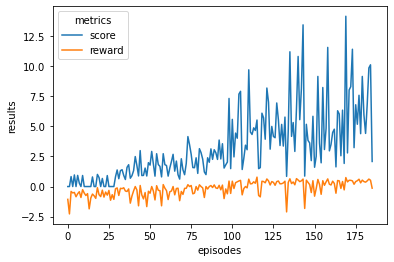

Max Train Score 26 Max Test Score 32
Mean Train Score 3.2394089240537856 Mean Test Score 7.131473432158382
----------------------------------------------------------------------------------------------------
gamma 0.9876222823273976


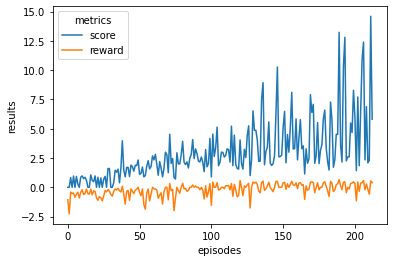

Max Train Score 28 Max Test Score 25
Mean Train Score 2.9877346769581914 Mean Test Score 5.816632344102752
----------------------------------------------------------------------------------------------------
gamma 0.9707112544682519


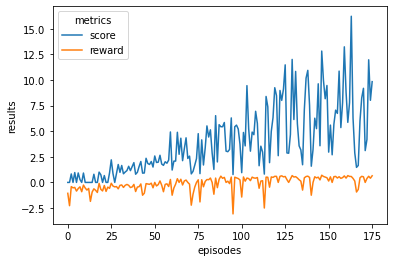

Max Train Score 31 Max Test Score 29
Mean Train Score 3.9176163693298647 Mean Test Score 7.854676127037267
----------------------------------------------------------------------------------------------------
gamma 0.9679556054918782


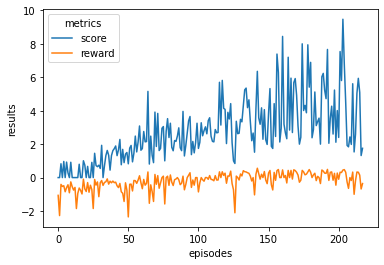

Max Train Score 17 Max Test Score 25
Mean Train Score 2.7526071651886737 Mean Test Score 5.886526187592308
----------------------------------------------------------------------------------------------------
gamma 0.9983405566784302


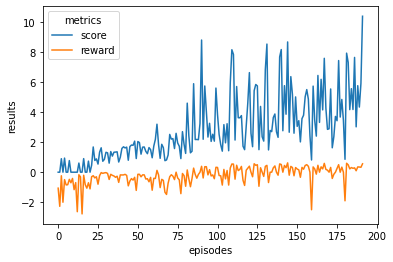

Max Train Score 20 Max Test Score 23
Mean Train Score 2.850919588890941 Mean Test Score 6.293665554495888
----------------------------------------------------------------------------------------------------
gamma 0.9978618446956322


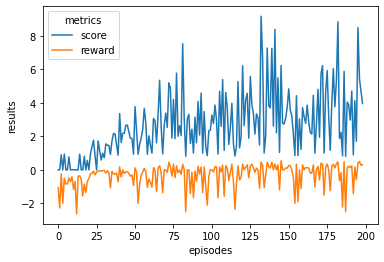

Max Train Score 17 Max Test Score 22
Mean Train Score 2.682139589352346 Mean Test Score 4.363658932443837
----------------------------------------------------------------------------------------------------
gamma 0.95662535022471


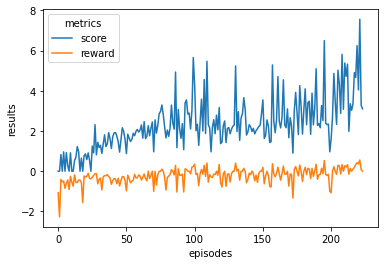

Max Train Score 13 Max Test Score 20
Mean Train Score 2.327993651521562 Mean Test Score 3.8997963225402428
----------------------------------------------------------------------------------------------------
gamma 0.9763227992700108


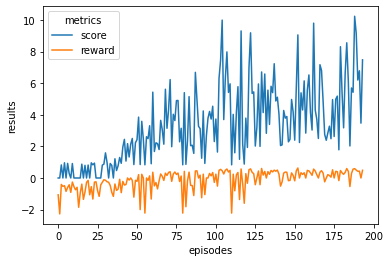

Max Train Score 20 Max Test Score 28
Mean Train Score 3.3114383369010114 Mean Test Score 6.463510233066527
----------------------------------------------------------------------------------------------------
gamma 0.9506332485779749


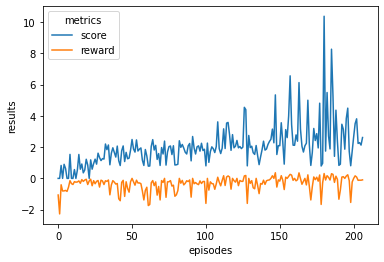

Max Train Score 20 Max Test Score 19
Mean Train Score 2.0143633199709616 Mean Test Score 3.257901885960763
----------------------------------------------------------------------------------------------------
gamma 0.9757687865104703


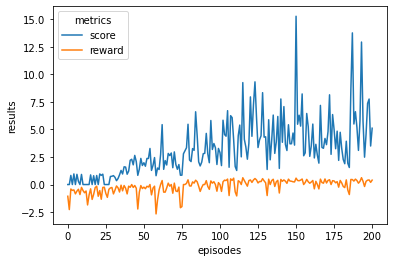

Max Train Score 31 Max Test Score 27
Mean Train Score 3.2525702154480287 Mean Test Score 4.87045239686959
----------------------------------------------------------------------------------------------------
gamma 0.9720049710389925


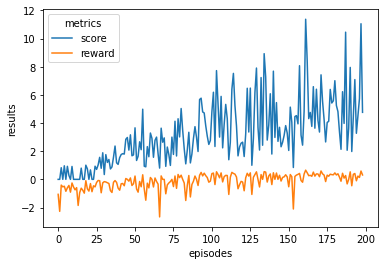

Max Train Score 22 Max Test Score 32
Mean Train Score 3.213722887117465 Mean Test Score 6.207990531910897
----------------------------------------------------------------------------------------------------
gamma 0.9525893637524327


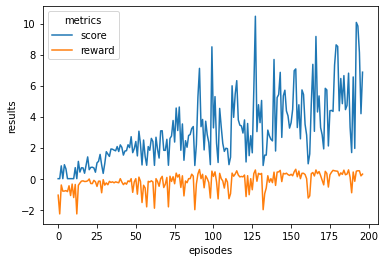

Max Train Score 20 Max Test Score 21
Mean Train Score 3.0626209718457758 Mean Test Score 5.522703145283191
----------------------------------------------------------------------------------------------------
gamma 0.9865465968743526


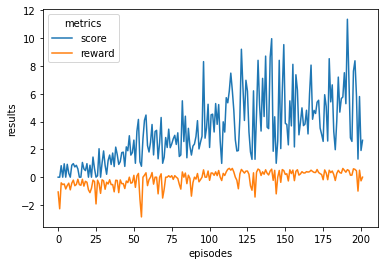

Max Train Score 28 Max Test Score 26
Mean Train Score 3.358887397200891 Mean Test Score 6.7750931751919845
----------------------------------------------------------------------------------------------------
gamma 0.9838591688494536


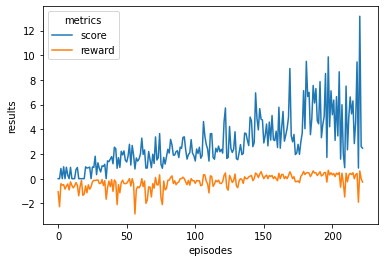

Max Train Score 25 Max Test Score 32
Mean Train Score 2.8650994779929784 Mean Test Score 6.209971907717444
----------------------------------------------------------------------------------------------------
gamma 0.9685921883823383


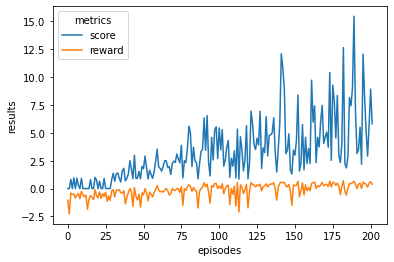

Max Train Score 28 Max Test Score 23
Mean Train Score 3.2652236480527717 Mean Test Score 5.987175415092134
----------------------------------------------------------------------------------------------------
gamma 0.9892253608643671


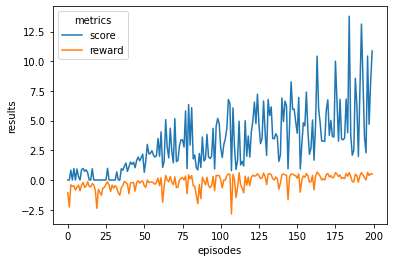

Max Train Score 27 Max Test Score 16
Mean Train Score 3.202830405855367 Mean Test Score 3.4632268693010295
----------------------------------------------------------------------------------------------------
gamma 0.956874576524848


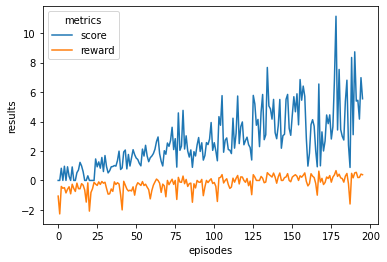

Max Train Score 23 Max Test Score 22
Mean Train Score 2.7145090330062804 Mean Test Score 5.555882985556777
----------------------------------------------------------------------------------------------------
gamma 0.9842657995897278


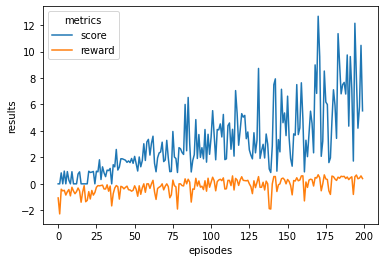

Max Train Score 24 Max Test Score 39
Mean Train Score 3.212175743848036 Mean Test Score 7.707977731041736
----------------------------------------------------------------------------------------------------
gamma 0.9535506000847691


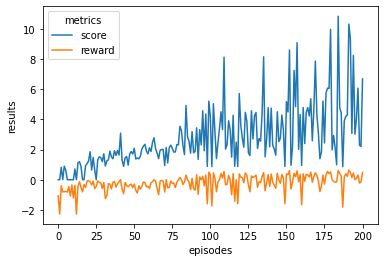

Max Train Score 20 Max Test Score 20
Mean Train Score 2.787210126221591 Mean Test Score 4.498253454052834
----------------------------------------------------------------------------------------------------
gamma 0.9554684712622143


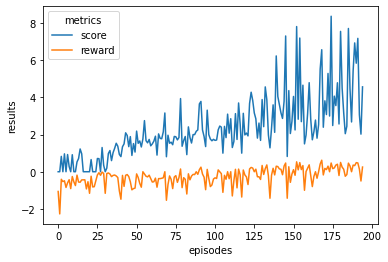

Max Train Score 15 Max Test Score 18
Mean Train Score 2.3189692695583832 Mean Test Score 5.124416330980406
----------------------------------------------------------------------------------------------------
gamma 0.9961113052255611


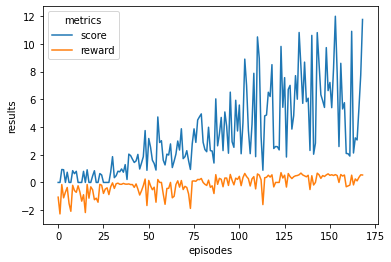

Max Train Score 23 Max Test Score 27
Mean Train Score 3.4616340224723294 Mean Test Score 7.100524346312207
----------------------------------------------------------------------------------------------------


In [15]:
results = {}
for i in range(50):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.95, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    print("iteration ", i, ": gamma", gamma)
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

<AxesSubplot:xlabel='gamma', ylabel='results'>

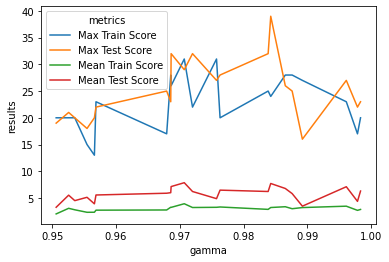

In [16]:
formatted_dict = {'gamma': [],
                  'metrics': [],
                  'results': []}

for gamma, result in results.items():
    _, max_train_score, max_test_score, mean_train_score, mean_test_score = result

    formatted_dict['gamma'].append(gamma)
    formatted_dict['metrics'].append('Max Train Score')
    formatted_dict['results'].append(max_train_score)

    formatted_dict['gamma'].append(gamma)
    formatted_dict['metrics'].append('Max Test Score')
    formatted_dict['results'].append(max_test_score)
    
    formatted_dict['gamma'].append(gamma)
    formatted_dict['metrics'].append('Mean Train Score')
    formatted_dict['results'].append(mean_train_score)

    formatted_dict['gamma'].append(gamma)
    formatted_dict['metrics'].append('Mean Test Score')
    formatted_dict['results'].append(mean_test_score)

df_metrics = pd.DataFrame(formatted_dict)
sns.lineplot(data=df_metrics, x='gamma', y='results', hue='metrics')

### Testando: normalize_advantage

Normalizar o ***advantage score*** piorou os resultados para todos os valores de gamma analizados.

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 119      |
|    ep_rew_mean        | -41.5    |
| time/                 |          |
|    fps                | 244      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.02    |
|    explained_variance | -0.00354 |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.115   |
|    value_loss         | 1e-06    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 117      |
|    ep_rew_mean        | -35.5    |
| time/                 |          |
|    fps                | 253      |
|    iterations         | 2000     |
|    time_elapsed       | 39       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 154      |
|    ep_rew_mean        | -40.9    |
| time/                 |          |
|    fps                | 238      |
|    iterations         | 2000     |
|    time_elapsed       | 41       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.535   |
|    explained_variance | 0.134    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.134   |
|    value_loss         | 0.0481   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 171      |
|    ep_rew_mean        | -38.5    |
| time/                 |          |
|    fps                | 235      |
|    iterations         | 3000     |
|    time_elapsed       | 63       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 85.2     |
|    ep_rew_mean        | -47.3    |
| time/                 |          |
|    fps                | 226      |
|    iterations         | 3000     |
|    time_elapsed       | 66       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.652   |
|    explained_variance | -0.329   |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.297   |
|    value_loss         | 0.00135  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.3     |
|    ep_rew_mean        | -48.9    |
| time/                 |          |
|    fps                | 229      |
|    iterations         | 4000     |
|    time_elapsed       | 87       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 106      |
|    ep_rew_mean        | -1       |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 4000     |
|    time_elapsed       | 84       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0162  |
|    explained_variance | -97.1    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | -0.00142 |
|    value_loss         | 61.2     |
------------------------------------
Gamma 0.9558658099721666


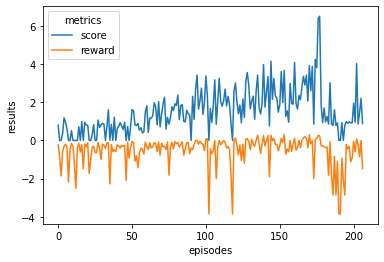

Max Train Score 10 Max Test Score 11
Mean Train Score 1.5313159062381123 Mean Test Score 2.4016239550087564
----------------------------------------------------------------------------------------------------
Gamma 0.9787879580368415


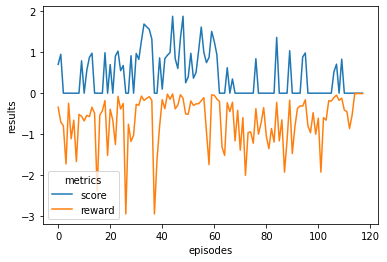

Max Train Score 3 Max Test Score 0
Mean Train Score 0.4207030777645884 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Gamma 0.9799472292230115


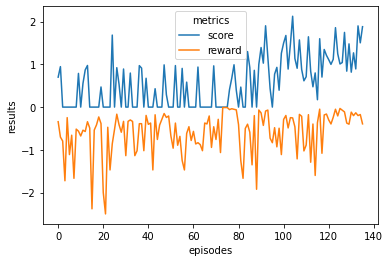

Max Train Score 4 Max Test Score 5
Mean Train Score 0.5743579519801391 Mean Test Score 1.5437310619002158
----------------------------------------------------------------------------------------------------
Gamma 0.9854392641917085


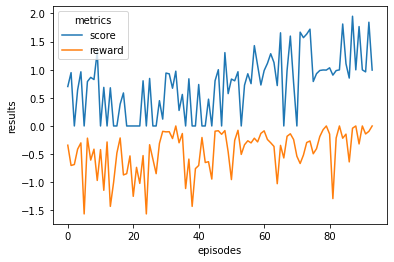

Max Train Score 3 Max Test Score 2
Mean Train Score 0.7300714261274825 Mean Test Score 0.8559496712900571
----------------------------------------------------------------------------------------------------
Gamma 0.9856474486409561


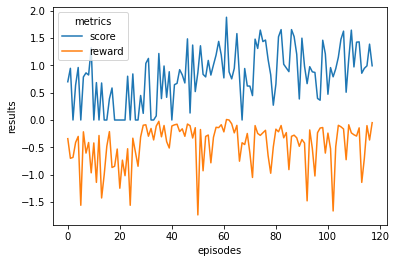

Max Train Score 3 Max Test Score 4
Mean Train Score 0.8129076985798346 Mean Test Score 1.438064314791575
----------------------------------------------------------------------------------------------------
Gamma 0.9667923768310657


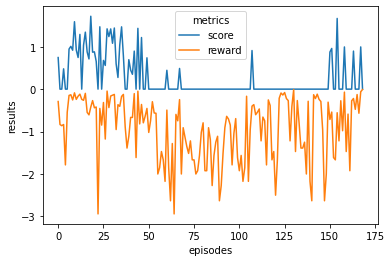

Max Train Score 3 Max Test Score 2
Mean Train Score 0.26159707373697694 Mean Test Score 0.47426771442392535
----------------------------------------------------------------------------------------------------
Gamma 0.9860360909680097


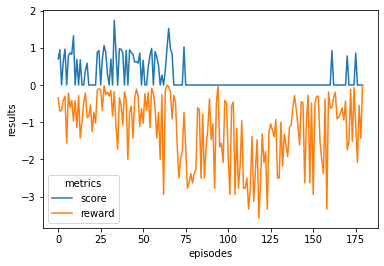

Max Train Score 3 Max Test Score 0
Mean Train Score 0.22331498570850422 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Gamma 0.9697815950530332


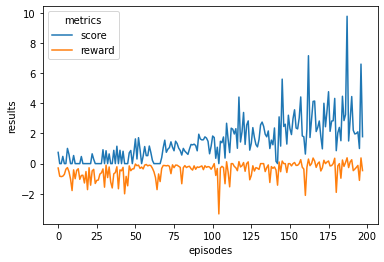

Max Train Score 17 Max Test Score 14
Mean Train Score 1.4815552229272635 Mean Test Score 2.3807075747839375
----------------------------------------------------------------------------------------------------
Gamma 0.9945665841176945


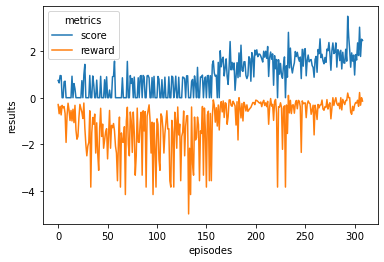

Max Train Score 9 Max Test Score 11
Mean Train Score 0.9708306040428534 Mean Test Score 2.350621533114969
----------------------------------------------------------------------------------------------------
Gamma 0.9982205014326955


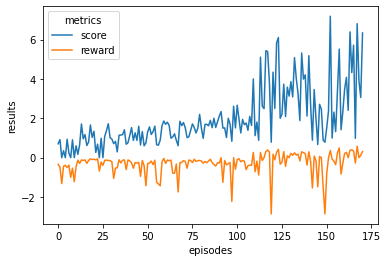

Max Train Score 13 Max Test Score 18
Mean Train Score 1.9621458424284015 Mean Test Score 3.745517725786342
----------------------------------------------------------------------------------------------------


In [5]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.95, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, normalize_advantage=True)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Testando: ent_coef

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 99.3     |
|    ep_rew_mean        | -40.8    |
| time/                 |          |
|    fps                | 215      |
|    iterations         | 1000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.763   |
|    explained_variance | 0.214    |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.0432   |
|    value_loss         | 0.00782  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 77.7     |
|    ep_rew_mean        | -15.5    |
| time/                 |          |
|    fps                | 219      |
|    iterations         | 2000     |
|    time_elapsed       | 45       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 80.9     |
|    ep_rew_mean        | -30.6    |
| time/                 |          |
|    fps                | 223      |
|    iterations         | 2000     |
|    time_elapsed       | 44       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.329   |
|    explained_variance | -60.5    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 0.0532   |
|    value_loss         | 17       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 73.7     |
|    ep_rew_mean        | -15.7    |
| time/                 |          |
|    fps                | 218      |
|    iterations         | 3000     |
|    time_elapsed       | 68       |
|    total_timesteps    | 15000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 80.8      |
|    ep_rew_mean        | 4.3       |
| time/                 |           |
|    fps                | 261       |
|    iterations         | 3000      |
|    time_elapsed       | 57        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.00246  |
|    explained_variance | -1.84e+11 |
|    learning_rate      | 0.001     |
|    n_updates          | 2999      |
|    policy_loss        | -0.000219 |
|    value_loss         | 0.954     |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 107      |
|    ep_rew_mean        | 27.7     |
| time/                 |          |
|    fps                | 268      |
|    iterations         | 4000     |
|    time_elapsed       | 74       |
|    total_timesteps    | 20000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 69.4     |
|    ep_rew_mean        | -11.4    |
| time/                 |          |
|    fps                | 288      |
|    iterations         | 4000     |
|    time_elapsed       | 69       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.907   |
|    explained_variance | 0.117    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 8.18     |
|    value_loss         | 79       |
------------------------------------
iteration  9 : entropy 0.09411298688522297
entropy 0.027588144086158686


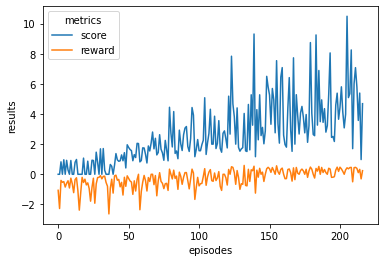

Max Train Score 19 Max Test Score 24
Mean Train Score 2.6565167757521153 Mean Test Score 3.7677387680878436
----------------------------------------------------------------------------------------------------
entropy 0.06469998479834042


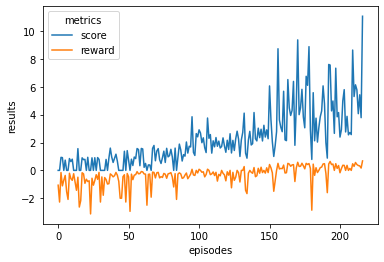

Max Train Score 22 Max Test Score 29
Mean Train Score 2.2352480211875734 Mean Test Score 5.623993226939822
----------------------------------------------------------------------------------------------------
entropy 0.049100731289210234


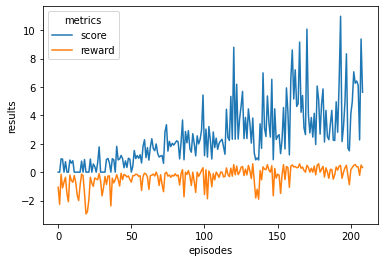

Max Train Score 21 Max Test Score 28
Mean Train Score 2.5307229756745313 Mean Test Score 5.251667872549002
----------------------------------------------------------------------------------------------------
entropy 0.06576016445807657


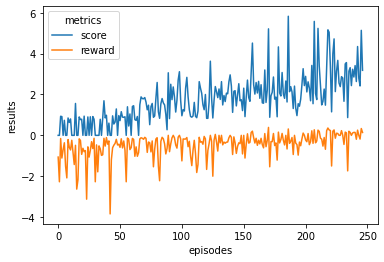

Max Train Score 12 Max Test Score 19
Mean Train Score 1.7515621284368479 Mean Test Score 4.249339912511456
----------------------------------------------------------------------------------------------------
entropy 0.09934834412430484


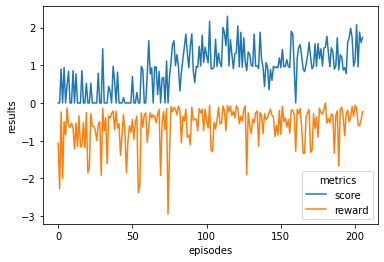

Max Train Score 5 Max Test Score 6
Mean Train Score 0.89959687239 Mean Test Score 1.3638151456759453
----------------------------------------------------------------------------------------------------
entropy 0.03145171571701679


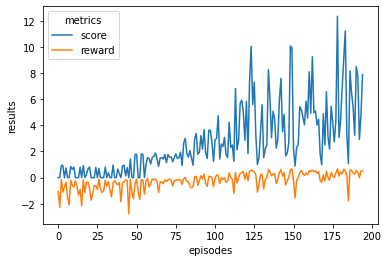

Max Train Score 23 Max Test Score 33
Mean Train Score 2.7401153036186754 Mean Test Score 7.067491104714738
----------------------------------------------------------------------------------------------------
entropy 0.0383709962837687


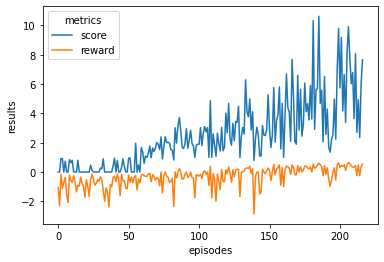

Max Train Score 28 Max Test Score 23
Mean Train Score 2.5184246503654877 Mean Test Score 6.06822675085481
----------------------------------------------------------------------------------------------------
entropy 0.028867031014121303


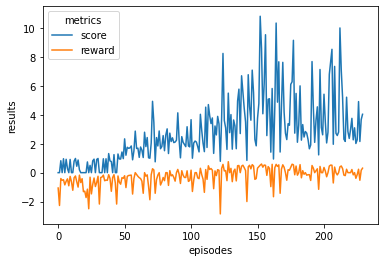

Max Train Score 21 Max Test Score 17
Mean Train Score 2.7991533204015746 Mean Test Score 3.448095259630329
----------------------------------------------------------------------------------------------------
entropy 0.08054404933702784


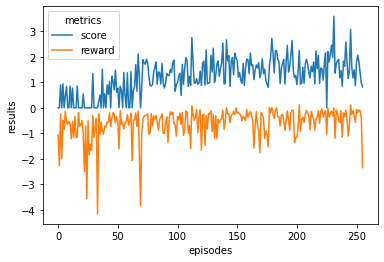

Max Train Score 6 Max Test Score 6
Mean Train Score 1.2303003639238899 Mean Test Score 1.5413768585949816
----------------------------------------------------------------------------------------------------
entropy 0.09411298688522297


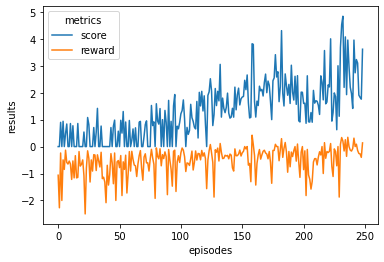

Max Train Score 10 Max Test Score 11
Mean Train Score 1.3286993355777386 Mean Test Score 2.1367135922081104
----------------------------------------------------------------------------------------------------


In [9]:
results = {}
for i in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    entropy = random.uniform(0, 0.1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=0.98, ent_coef=entropy)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    print("iteration ", i, ": entropy", entropy)
    results[entropy] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for entropy, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("entropy", entropy)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

<AxesSubplot:xlabel='entropy', ylabel='results'>

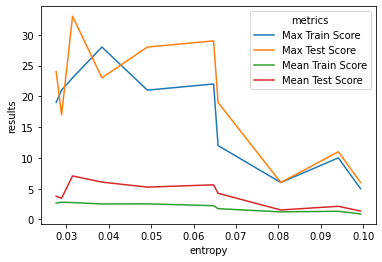

In [11]:
formatted_dict = {'entropy': [],
                  'metrics': [],
                  'results': []}

for entropy, result in results.items():
    _, max_train_score, max_test_score, mean_train_score, mean_test_score = result

    formatted_dict['entropy'].append(entropy)
    formatted_dict['metrics'].append('Max Train Score')
    formatted_dict['results'].append(max_train_score)

    formatted_dict['entropy'].append(entropy)
    formatted_dict['metrics'].append('Max Test Score')
    formatted_dict['results'].append(max_test_score)
    
    formatted_dict['entropy'].append(entropy)
    formatted_dict['metrics'].append('Mean Train Score')
    formatted_dict['results'].append(mean_train_score)

    formatted_dict['entropy'].append(entropy)
    formatted_dict['metrics'].append('Mean Test Score')
    formatted_dict['results'].append(mean_test_score)

df_metrics = pd.DataFrame(formatted_dict)
sns.lineplot(data=df_metrics, x='entropy', y='results', hue='metrics')

### Testando: vf_coef

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 90.8     |
|    ep_rew_mean        | -44.1    |
| time/                 |          |
|    fps                | 204      |
|    iterations         | 1000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.07    |
|    explained_variance | 0.00165  |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.0369  |
|    value_loss         | 0.00134  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 84       |
|    ep_rew_mean        | -32.1    |
| time/                 |          |
|    fps                | 210      |
|    iterations         | 2000     |
|    time_elapsed       | 47       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 83.5     |
|    ep_rew_mean        | -29.3    |
| time/                 |          |
|    fps                | 197      |
|    iterations         | 2000     |
|    time_elapsed       | 50       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.92    |
|    explained_variance | -2.4     |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.0734  |
|    value_loss         | 0.00487  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 64.4     |
|    ep_rew_mean        | -10.6    |
| time/                 |          |
|    fps                | 198      |
|    iterations         | 3000     |
|    time_elapsed       | 75       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 82.8     |
|    ep_rew_mean        | 1.3      |
| time/                 |          |
|    fps                | 208      |
|    iterations         | 3000     |
|    time_elapsed       | 72       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.109   |
|    explained_variance | -0.297   |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.0284  |
|    value_loss         | 2.84     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 98.2     |
|    ep_rew_mean        | 22.9     |
| time/                 |          |
|    fps                | 208      |
|    iterations         | 4000     |
|    time_elapsed       | 95       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 109      |
|    ep_rew_mean        | 34.1     |
| time/                 |          |
|    fps                | 209      |
|    iterations         | 4000     |
|    time_elapsed       | 95       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.267   |
|    explained_variance | -0.307   |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | -0.318   |
|    value_loss         | 18.2     |
------------------------------------
iteration  9 : vf_coef 0.33192468638134454
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 92.1     |
|    ep_rew_mean        | -36.9    |
| time/                 |          |
|    fps                | 204      |
|    iterations         | 1000     |
|    time_elapsed       | 24       |
|    total_time

iteration  12 : vf_coef 0.37070492143125844
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 90.1     |
|    ep_rew_mean        | -44      |
| time/                 |          |
|    fps                | 177      |
|    iterations         | 1000     |
|    time_elapsed       | 28       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.05    |
|    explained_variance | 0.0748   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.0482  |
|    value_loss         | 0.00394  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93.5     |
|    ep_rew_mean        | -35.2    |
| time/                 |          |
|    fps                | 179      |
|    iterations         | 2000     |
|    time_elapsed       | 55       |
|    total_tim

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 77.9     |
|    ep_rew_mean        | -32      |
| time/                 |          |
|    fps                | 259      |
|    iterations         | 2000     |
|    time_elapsed       | 38       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -1.03    |
|    explained_variance | -0.494   |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.0483  |
|    value_loss         | 0.00372  |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 71.4      |
|    ep_rew_mean        | -21.1     |
| time/                 |           |
|    fps                | 269       |
|    iterations         | 3000      |
|    time_elapsed       | 55        |
|    total_timesteps    | 15000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.9     |
|    ep_rew_mean        | -7.5     |
| time/                 |          |
|    fps                | 242      |
|    iterations         | 3000     |
|    time_elapsed       | 61       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.633   |
|    explained_variance | -0.515   |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.173   |
|    value_loss         | 0.0778   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 92.4     |
|    ep_rew_mean        | 11.2     |
| time/                 |          |
|    fps                | 243      |
|    iterations         | 4000     |
|    time_elapsed       | 82       |
|    total_timesteps    | 20000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 107       |
|    ep_rew_mean        | 29.8      |
| time/                 |           |
|    fps                | 293       |
|    iterations         | 4000      |
|    time_elapsed       | 68        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.0448   |
|    explained_variance | -1.47e+11 |
|    learning_rate      | 0.001     |
|    n_updates          | 3999      |
|    policy_loss        | -0.00563  |
|    value_loss         | 0.765     |
-------------------------------------
iteration  22 : vf_coef 0.21912860093534392
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.4     |
|    ep_rew_mean        | -45.3    |
| time/                 |          |
|    fps                | 246      |
|    iterations         | 1000     |
|    time_elapsed       | 20      

iteration  25 : vf_coef 0.06175804755668379
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 89.9     |
|    ep_rew_mean        | -35.6    |
| time/                 |          |
|    fps                | 245      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.842   |
|    explained_variance | 0.11     |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.0062  |
|    value_loss         | 0.00587  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 80.1     |
|    ep_rew_mean        | -16.4    |
| time/                 |          |
|    fps                | 277      |
|    iterations         | 2000     |
|    time_elapsed       | 35       |
|    total_tim

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 80.7     |
|    ep_rew_mean        | -23.5    |
| time/                 |          |
|    fps                | 243      |
|    iterations         | 2000     |
|    time_elapsed       | 40       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.239   |
|    explained_variance | 0.47     |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 1.16     |
|    value_loss         | 34.4     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 82       |
|    ep_rew_mean        | 7.9      |
| time/                 |          |
|    fps                | 257      |
|    iterations         | 3000     |
|    time_elapsed       | 58       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 82.7     |
|    ep_rew_mean        | 13.3     |
| time/                 |          |
|    fps                | 259      |
|    iterations         | 3000     |
|    time_elapsed       | 57       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.0172  |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.00267 |
|    value_loss         | 1.56     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 103      |
|    ep_rew_mean        | 31.2     |
| time/                 |          |
|    fps                | 278      |
|    iterations         | 4000     |
|    time_elapsed       | 71       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 82.9     |
|    ep_rew_mean        | 3.9      |
| time/                 |          |
|    fps                | 270      |
|    iterations         | 4000     |
|    time_elapsed       | 74       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.232   |
|    explained_variance | 0.717    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | -0.0625  |
|    value_loss         | 0.239    |
------------------------------------
iteration  35 : vf_coef 0.6336277633502977
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 76.9     |
|    ep_rew_mean        | -43.8    |
| time/                 |          |
|    fps                | 256      |
|    iterations         | 1000     |
|    time_elapsed       | 19       |
|    total_time

iteration  38 : vf_coef 0.596739042818947
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 97.5     |
|    ep_rew_mean        | -45.3    |
| time/                 |          |
|    fps                | 246      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.92    |
|    explained_variance | 0.057    |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.0182  |
|    value_loss         | 0.00633  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 97.3     |
|    ep_rew_mean        | -33.4    |
| time/                 |          |
|    fps                | 244      |
|    iterations         | 2000     |
|    time_elapsed       | 40       |
|    total_times

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 72       |
|    ep_rew_mean        | -21.8    |
| time/                 |          |
|    fps                | 242      |
|    iterations         | 2000     |
|    time_elapsed       | 41       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.88    |
|    explained_variance | 0.0241   |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -1.52    |
|    value_loss         | 1.75     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 77.4     |
|    ep_rew_mean        | -5.8     |
| time/                 |          |
|    fps                | 241      |
|    iterations         | 3000     |
|    time_elapsed       | 61       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.9     |
|    ep_rew_mean        | -16.2    |
| time/                 |          |
|    fps                | 350      |
|    iterations         | 3000     |
|    time_elapsed       | 42       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.412   |
|    explained_variance | -56      |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -10.3    |
|    value_loss         | 563      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.7     |
|    ep_rew_mean        | -1.2     |
| time/                 |          |
|    fps                | 354      |
|    iterations         | 4000     |
|    time_elapsed       | 56       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 77.2     |
|    ep_rew_mean        | -5.8     |
| time/                 |          |
|    fps                | 362      |
|    iterations         | 4000     |
|    time_elapsed       | 55       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.752   |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | -0.0388  |
|    value_loss         | 0.0186   |
------------------------------------
iteration  48 : vf_coef 0.4760051001318911
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 104      |
|    ep_rew_mean        | -44      |
| time/                 |          |
|    fps                | 252      |
|    iterations         | 1000     |
|    time_elapsed       | 19       |
|    total_time

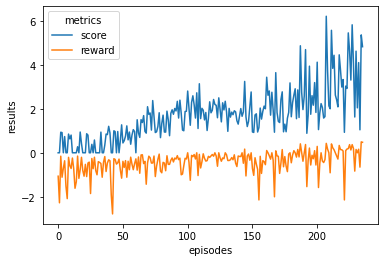

Max Train Score 13 Max Test Score 22
Mean Train Score 1.7178732356506208 Mean Test Score 4.906122214350749
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


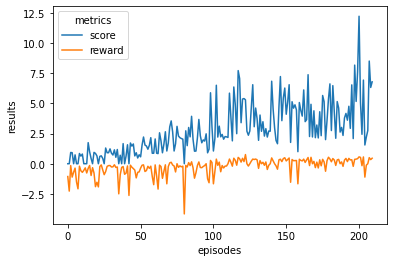

Max Train Score 23 Max Test Score 35
Mean Train Score 2.7901054304603456 Mean Test Score 6.008247133195176
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


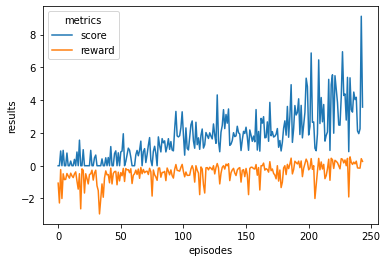

Max Train Score 16 Max Test Score 17
Mean Train Score 1.7905845149368098 Mean Test Score 3.227835122290369
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


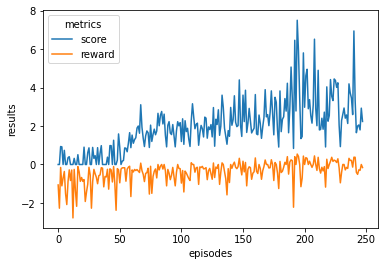

Max Train Score 14 Max Test Score 22
Mean Train Score 1.955651624564859 Mean Test Score 4.4114797251633275
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


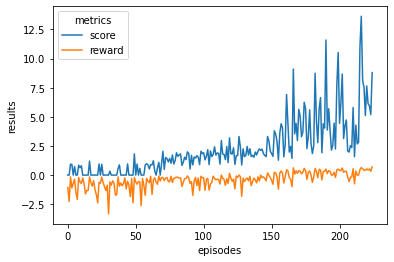

Max Train Score 25 Max Test Score 31
Mean Train Score 2.2602882157299193 Mean Test Score 6.056178713579266
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


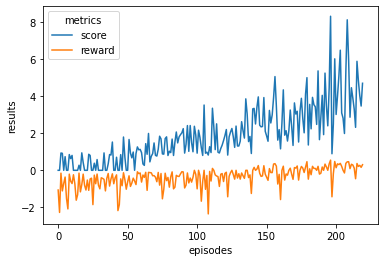

Max Train Score 16 Max Test Score 23
Mean Train Score 1.901739347415207 Mean Test Score 4.859124301864453
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


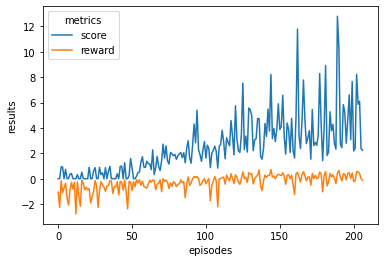

Max Train Score 23 Max Test Score 21
Mean Train Score 2.483187032733597 Mean Test Score 5.208599674887313
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


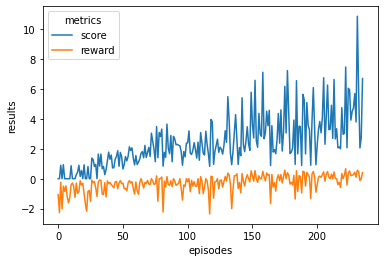

Max Train Score 21 Max Test Score 17
Mean Train Score 2.4135017876390275 Mean Test Score 3.947712663328662
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


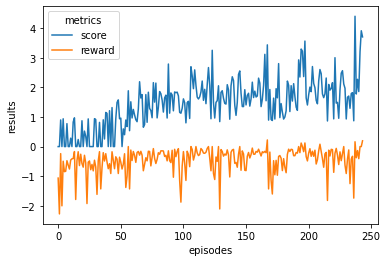

Max Train Score 8 Max Test Score 13
Mean Train Score 1.4605117027447656 Mean Test Score 2.231488914492677
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


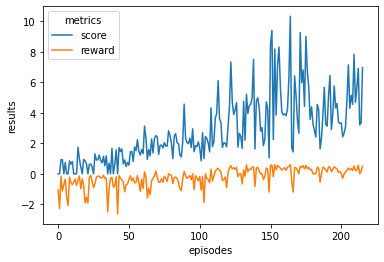

Max Train Score 22 Max Test Score 21
Mean Train Score 2.839808450583385 Mean Test Score 4.942504521811902
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


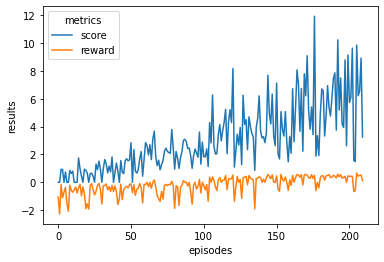

Max Train Score 22 Max Test Score 27
Mean Train Score 3.0583926017549974 Mean Test Score 6.029887406478991
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


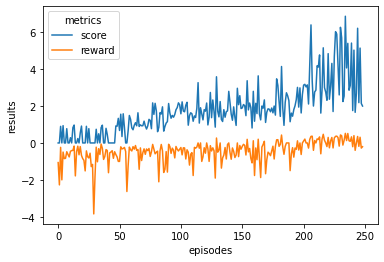

Max Train Score 14 Max Test Score 19
Mean Train Score 1.7989242270900279 Mean Test Score 4.262728829415234
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


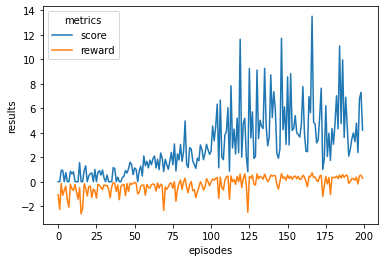

Max Train Score 25 Max Test Score 28
Mean Train Score 2.9343222785308565 Mean Test Score 5.943102334870665
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


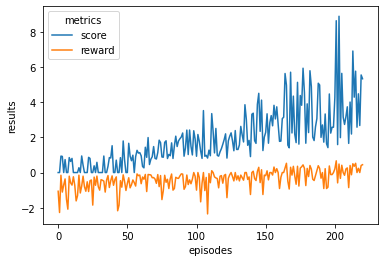

Max Train Score 17 Max Test Score 23
Mean Train Score 1.9199325846323385 Mean Test Score 5.301452998828485
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


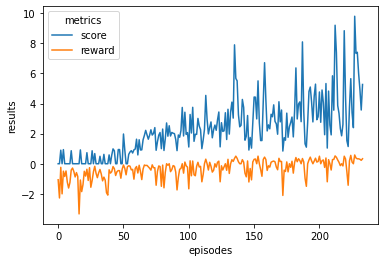

Max Train Score 17 Max Test Score 19
Mean Train Score 2.326930443590284 Mean Test Score 4.163924718074459
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


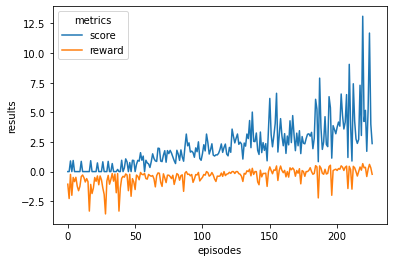

Max Train Score 25 Max Test Score 32
Mean Train Score 2.1399450825271495 Mean Test Score 5.913058563693646
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


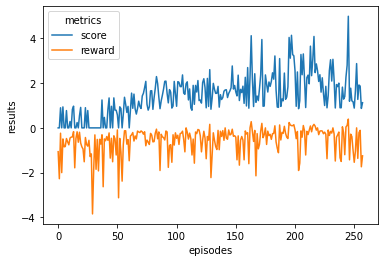

Max Train Score 9 Max Test Score 11
Mean Train Score 1.4505564737604855 Mean Test Score 2.1886508463020564
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


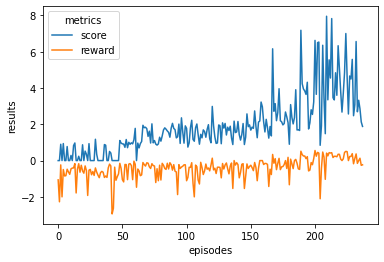

Max Train Score 16 Max Test Score 19
Mean Train Score 1.8933156653777772 Mean Test Score 5.020861706041362
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


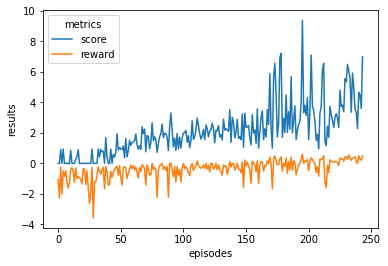

Max Train Score 20 Max Test Score 21
Mean Train Score 2.1301501631531474 Mean Test Score 5.114871759425762
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


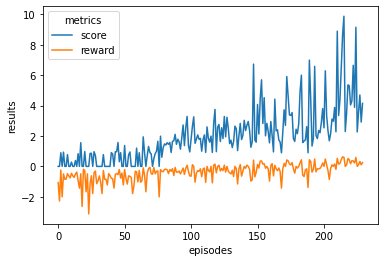

Max Train Score 19 Max Test Score 24
Mean Train Score 2.0065510453908364 Mean Test Score 5.183760092913137
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


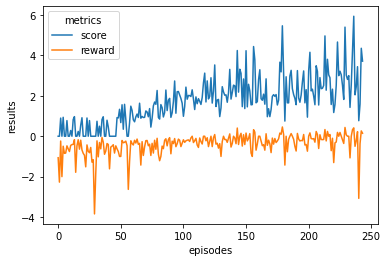

Max Train Score 12 Max Test Score 18
Mean Train Score 1.7355494844104504 Mean Test Score 3.4591632918109845
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


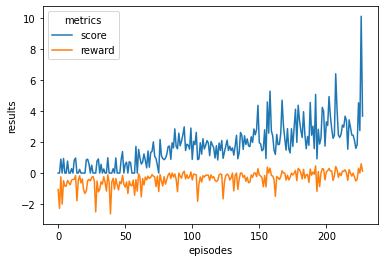

Max Train Score 20 Max Test Score 17
Mean Train Score 1.7103076439894578 Mean Test Score 4.624236828707763
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


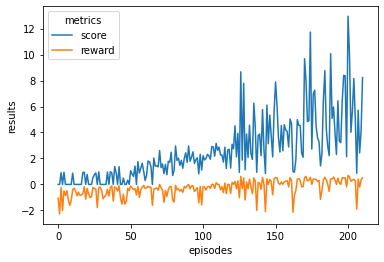

Max Train Score 25 Max Test Score 24
Mean Train Score 2.6051716173568273 Mean Test Score 6.491214950036414
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


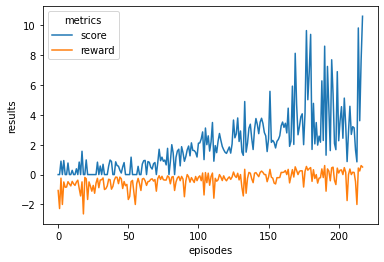

Max Train Score 19 Max Test Score 19
Mean Train Score 2.0496338599131585 Mean Test Score 4.418586281516004
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


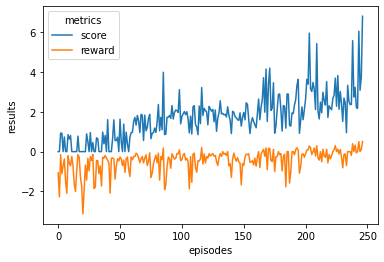

Max Train Score 11 Max Test Score 17
Mean Train Score 1.7184363097385962 Mean Test Score 3.744687805370703
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


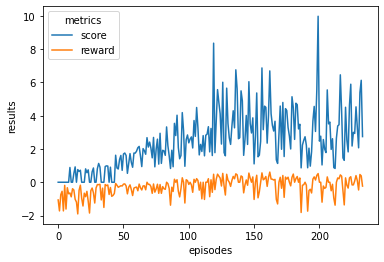

Max Train Score 19 Max Test Score 17
Mean Train Score 2.407289831241573 Mean Test Score 2.7306291641140263
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


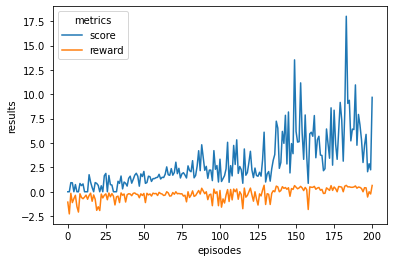

Max Train Score 33 Max Test Score 27
Mean Train Score 3.014821778727757 Mean Test Score 6.201672080891841
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


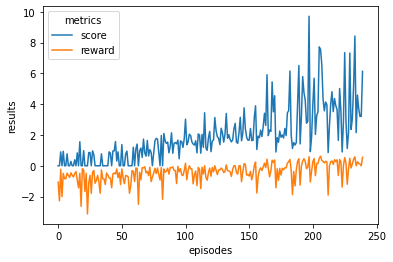

Max Train Score 18 Max Test Score 26
Mean Train Score 1.9471147276775524 Mean Test Score 5.0649513279107
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


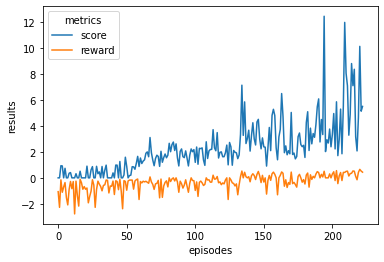

Max Train Score 26 Max Test Score 24
Mean Train Score 2.2894178592781 Mean Test Score 4.949487708799457
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


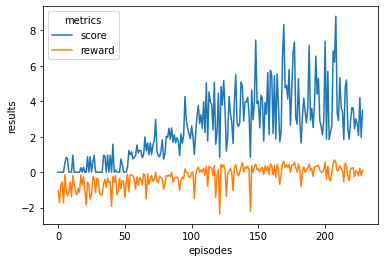

Max Train Score 17 Max Test Score 19
Mean Train Score 2.4712702610779225 Mean Test Score 4.247423973843965
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


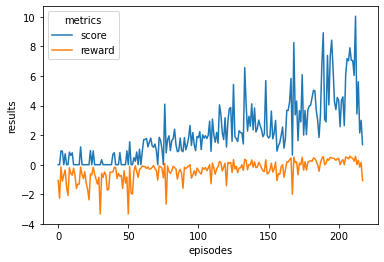

Max Train Score 18 Max Test Score 19
Mean Train Score 2.2155663318745873 Mean Test Score 4.578873318119271
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


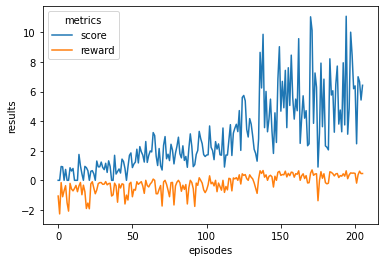

Max Train Score 22 Max Test Score 27
Mean Train Score 2.988766409785627 Mean Test Score 5.809063991471831
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


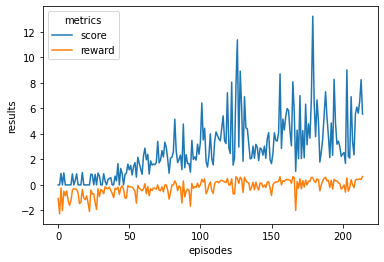

Max Train Score 25 Max Test Score 32
Mean Train Score 2.822373297443182 Mean Test Score 5.409008656768258
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


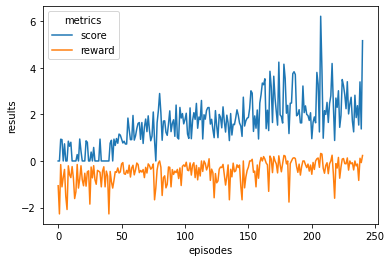

Max Train Score 12 Max Test Score 9
Mean Train Score 1.6473401022716516 Mean Test Score 2.202170715706884
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


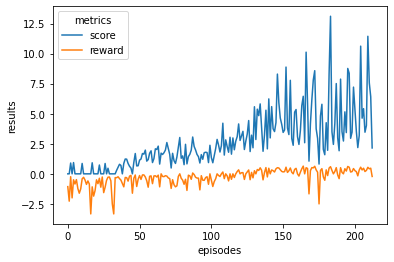

Max Train Score 29 Max Test Score 25
Mean Train Score 2.7009325051417363 Mean Test Score 5.394278560537753
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


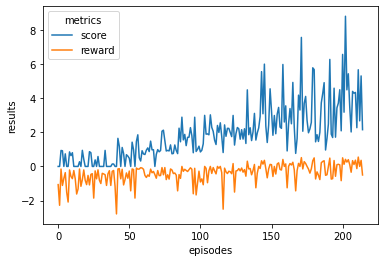

Max Train Score 17 Max Test Score 26
Mean Train Score 1.8831786471088945 Mean Test Score 4.962263336688877
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


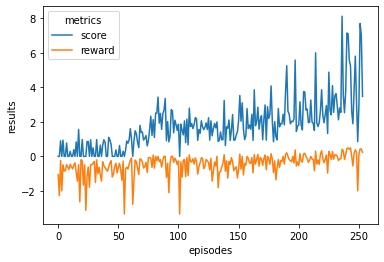

Max Train Score 15 Max Test Score 25
Mean Train Score 1.790283413535672 Mean Test Score 4.974662830539852
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


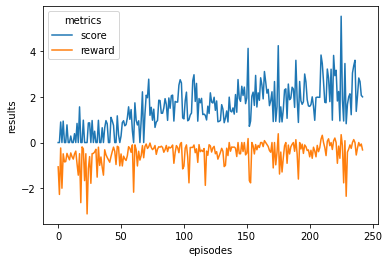

Max Train Score 11 Max Test Score 9
Mean Train Score 1.513021408406091 Mean Test Score 2.03651891240694
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


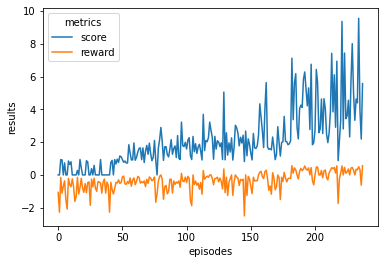

Max Train Score 19 Max Test Score 20
Mean Train Score 2.1147012161128256 Mean Test Score 3.9686855093018636
----------------------------------------------------------------------------------------------------
vf_coef 0.06175804755668379


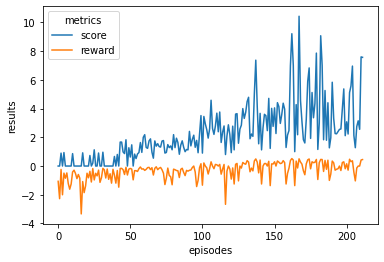

Max Train Score 20 Max Test Score 21
Mean Train Score 2.2578662884981164 Mean Test Score 4.325378217363663
----------------------------------------------------------------------------------------------------


In [12]:
results = {}
for i in range(50):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    vf_coef = random.uniform(0, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=0.98, ent_coef=0.06, vf_coef=vf_coef)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    print("iteration ", i, ": vf_coef", vf_coef)
    results[vf_coef] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for entropy, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("vf_coef", vf_coef)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

<AxesSubplot:xlabel='vf_coef', ylabel='results'>

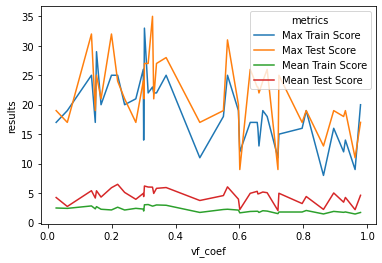

In [13]:
formatted_dict = {'vf_coef': [],
                  'metrics': [],
                  'results': []}

for vf_coef, result in results.items():
    _, max_train_score, max_test_score, mean_train_score, mean_test_score = result

    formatted_dict['vf_coef'].append(vf_coef)
    formatted_dict['metrics'].append('Max Train Score')
    formatted_dict['results'].append(max_train_score)

    formatted_dict['vf_coef'].append(vf_coef)
    formatted_dict['metrics'].append('Max Test Score')
    formatted_dict['results'].append(max_test_score)
    
    formatted_dict['vf_coef'].append(vf_coef)
    formatted_dict['metrics'].append('Mean Train Score')
    formatted_dict['results'].append(mean_train_score)

    formatted_dict['vf_coef'].append(vf_coef)
    formatted_dict['metrics'].append('Mean Test Score')
    formatted_dict['results'].append(mean_test_score)

df_metrics = pd.DataFrame(formatted_dict)
sns.lineplot(data=df_metrics, x='vf_coef', y='results', hue='metrics')

### Melhor Configuração

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 87.6     |
|    ep_rew_mean        | -33.3    |
| time/                 |          |
|    fps                | 302      |
|    iterations         | 1000     |
|    time_elapsed       | 16       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.411   |
|    explained_variance | -0.77    |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -17.3    |
|    value_loss         | 2.65e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.9     |
|    ep_rew_mean        | -5.8     |
| time/                 |          |
|    fps                | 329      |
|    iterations         | 2000     |
|    time_elapsed       | 30       |
|    total_timesteps    | 10000    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 239       |
|    ep_rew_mean        | 118       |
| time/                 |           |
|    fps                | 294       |
|    iterations         | 14000     |
|    time_elapsed       | 237       |
|    total_timesteps    | 70000     |
| train/                |           |
|    entropy_loss       | -7.37e-06 |
|    explained_variance | nan       |
|    learning_rate      | 0.001     |
|    n_updates          | 13999     |
|    policy_loss        | -0        |
|    value_loss         | 1.03      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 251       |
|    ep_rew_mean        | 126       |
| time/                 |           |
|    fps                | 296       |
|    iterations         | 15000     |
|    time_elapsed       | 252       |
|    total_timesteps    | 75000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 278       |
|    ep_rew_mean        | 150       |
| time/                 |           |
|    fps                | 291       |
|    iterations         | 27000     |
|    time_elapsed       | 463       |
|    total_timesteps    | 135000    |
| train/                |           |
|    entropy_loss       | -4.55e-05 |
|    explained_variance | nan       |
|    learning_rate      | 0.001     |
|    n_updates          | 26999     |
|    policy_loss        | 3.83e-07  |
|    value_loss         | 0.214     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 279       |
|    ep_rew_mean        | 152       |
| time/                 |           |
|    fps                | 290       |
|    iterations         | 28000     |
|    time_elapsed       | 481       |
|    total_timesteps    | 140000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 261       |
|    ep_rew_mean        | 138       |
| time/                 |           |
|    fps                | 309       |
|    iterations         | 40000     |
|    time_elapsed       | 645       |
|    total_timesteps    | 200000    |
| train/                |           |
|    entropy_loss       | -2.32e-05 |
|    explained_variance | nan       |
|    learning_rate      | 0.001     |
|    n_updates          | 39999     |
|    policy_loss        | -1.03e-06 |
|    value_loss         | 0.356     |
-------------------------------------


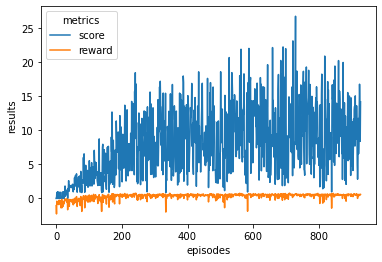

Max Train Score 55 Max Test Score 45
Mean Train Score 8.030493967230454 Mean Test Score 11.065142045770635


In [4]:
# enable_render=True turns on the display
snake_env = SnakeEnv(440, 440, enable_render=False)
env = make_vec_env(lambda: snake_env, n_envs=1)

vf_coef = random.uniform(0, 1)

model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=0.9842657995897278)
model.learn(total_timesteps=200000, log_interval=1000)

# Print rewards and scores for each episode
max_train_score = snake_env.record
mean_train_score = np.mean(np.array(snake_env.results['score']))
max_test_score, mean_test_score = evaluate(model)

plot_metrics(snake_env.results)    
print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)

**Descrição**

O A2C é um algoritmo on-policy derivado do REINFORCE que introduz o conceito de *advantage value*. Assim, o algoritmo funciona do seguindo modo: o "Crítico" estima a função valor, enquanto o "Ator" atualiza a política na direção sugerida pelo Crítico [1].

**Discussão:**

Podemos observar que a variação do fator de desconto gamma tem uma influência bastante significativa nos resultados obtidos pelo agente. Em contra partida, os parâmetros "coeficiente de entropia" e "coeficiente da Função Valor", ambos usados no cálculo da *loss*, não trouxeram nenhum ganho expressivo. A partir de uma análise exploratória do tipo *random search* sobre esses parâmetros, observamos que valores menores para o gamma geram resultados bastante ruins, enquanto que valores no intevalo \[0.95, 1.0\] geram os melhores resultados. Além disso, também observamos que quanto maiores os valores do "coeficiente de entropia" e do "coeficiente da Função Valor", piores são os resultados. Experimentamos normalizar o *advantage value*, pois é indicado como uma boa prática no artigo [1], porém os resultados foram piores que não normalizando. Acreditamos que esse resultado pior se deva ao fato de a função *reward* retornar -50 quando a cobra morre, 10 quando ela come a maçã e zero nos outros casos, dessa forma não uma variedade que seja grande o suficiente para que a normalização ajude de alguma forma. Por fim, a melhor configuração obtida foi com:

gamma = 0.9842657995897278
coeficiente de entropia = 0.0 (default)
coeficiente da Função Valor  = 0.5 (default)

A pontuação máxima obtida  por esse algoritmo após o treino foi de 36.

**Referências**

[1] https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f

[2] Mnih, Volodymyr, et al. "Asynchronous methods for deep reinforcement learning." International conference on machine learning. PMLR, 2016.